## Demo Kmean

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### Phân cụm

In [15]:
# 1. Đọc dữ liệu từ file CSV
csv_path = "data/student_logs_chapter1_full.csv"
df_full = pd.read_csv(csv_path)
# 2. Bỏ cột không cần thiết nếu có (ví dụ assignment_status nếu không dùng)
features = df_full.drop(columns=["assignment_status"])  # hoặc bỏ thêm các cột khác nếu muốn
X = features.values

# 3. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 4. Chạy KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 5. Gắn nhãn vào DataFrame
df_full["cluster"] = labels
cluster_names = {
    0: "Skipper (xem lướt, làm ít)",
    1: "Active learner (chăm chỉ)"
}
df_full["cluster_name"] = df_full["cluster"].map(cluster_names)

### Lưu 2 cụm vào từng file csv tương ứng

In [16]:
# --------------------- LƯU MỖI CỤM RA 1 FILE ---------------------
from pathlib import Path

data_dir = Path("data")        # thư mục đã có sẵn
for cid, grp in df_full.groupby("cluster"):
    out_path = data_dir / f"cluster{cid}.csv"
    grp.to_csv(out_path, index=False)
    print(f"✅ Đã lưu cụm {cid} ({cluster_names[cid]}) → {out_path}")

✅ Đã lưu cụm 0 (Skipper (xem lướt, làm ít)) → data/cluster0.csv
✅ Đã lưu cụm 1 (Active learner (chăm chỉ)) → data/cluster1.csv


### Trực quan kết quả

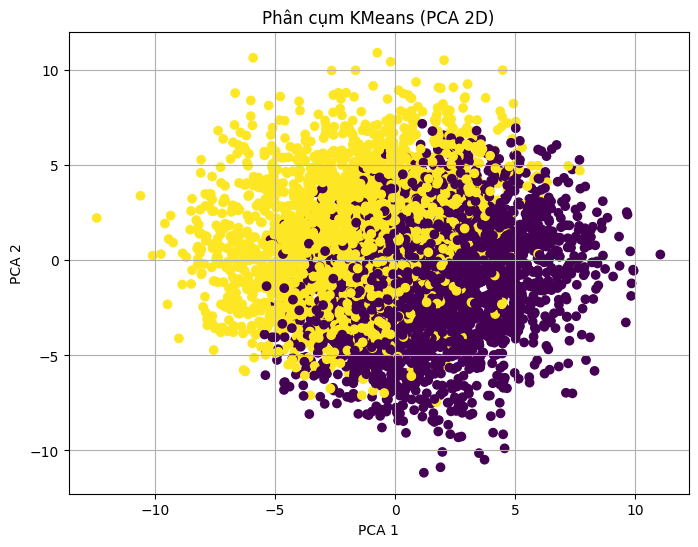

In [17]:
# --------------------- PCA 2D ---------------------
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
plt.title("Phân cụm KMeans (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

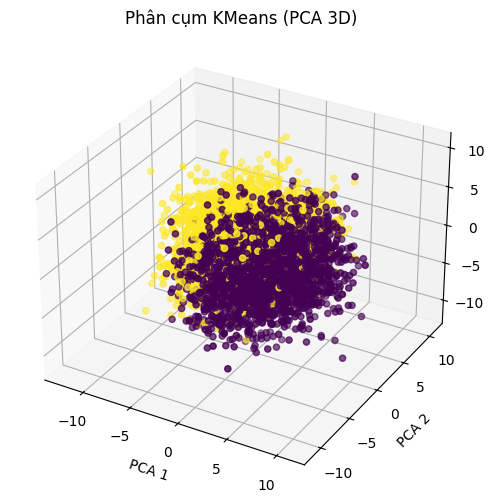

In [18]:
# --------------------- PCA 3D ---------------------
pca_3d = PCA(n_components=3, random_state=42)
X_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='viridis')
ax.set_title("Phân cụm KMeans (PCA 3D)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()

In [19]:
# --------------------- Trung bình từng cụm ---------------------
cluster_summary = df_full.groupby("cluster_name").mean(numeric_only=True).round(2)
print("\n📊 Trung bình các đặc trưng theo từng cụm:")
print(cluster_summary)


📊 Trung bình các đặc trưng theo từng cụm:
                            pdf_views_1_1  video_views_1_1  quiz_avg_easy_1_1  \
cluster_name                                                                    
Active learner (chăm chỉ)            2.27             2.23               3.13   
Skipper (xem lướt, làm ít)           2.77             2.81               3.94   

                            quiz_avg_medium_1_1  quiz_avg_hard_1_1  \
cluster_name                                                         
Active learner (chăm chỉ)                  2.94               2.74   
Skipper (xem lướt, làm ít)                 3.66               3.43   

                            pdf_views_1_2  video_views_1_2  quiz_avg_easy_1_2  \
cluster_name                                                                    
Active learner (chăm chỉ)            2.47             2.39               3.42   
Skipper (xem lướt, làm ít)           2.56             2.56               3.60   

                          